In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas import Series, DataFrame
import nltk

import spacy
import string

from gensim import corpora, models, similarities

import tensorflow as tf
import tensorflow_hub as hub

from gensim.models import Word2Vec

In [2]:
from google.colab import files 
uploaded = files.upload() 

Saving balanced_active_news.csv to balanced_active_news.csv


In [3]:
df = pd.read_csv('balanced_active_news.csv', usecols=['CONTENT','sentiment'])
df.head(10)
df['label']=df['sentiment']
df['label'].value_counts()

neutral     2170
negative    2170
positive    2170
Name: label, dtype: int64

In [4]:
for i, item in enumerate (df['label']):
  if item=='positive':
    df['label'][i]=2
  if item=='neutral':
    df['label'][i]=1
  if item=='negative':
    df['label'][i]=0
df['label'].value_counts()

2    2170
1    2170
0    2170
Name: label, dtype: int64

In [5]:
from google.colab import files 
uploaded = files.upload() 

Saving test.csv to test.csv


In [6]:
tdf = pd.read_csv('test.csv')
len(tdf)
tdf

,CONTENT,label
0,mclean va oct 08 2019 globe newswire gladstone...,1
1,add detail background share sept 9 reuters fre...,0
2,acceleron pharma inc xlrn announce the discont...,0
3,corona ca accesswire october 3 2019 adomani in...,0
4,corona ca accesswire september 20 2019 adomani...,2
5,corona ca accesswire september 26 2019 adomani...,2
6,bloomberg tilman fertitta have to wait to land...,1
7,plan to resume trade on over the counter marke...,1
8,beijing may 23 2019 globe newswire chinacache ...,0
9,beijing aug 28 2019 globe newswire chinacache ...,1


In [7]:
tdf.dropna(subset=['label'], inplace=True)
len(tdf)

370

In [0]:
x = df['CONTENT']
y = df['label']
x_test=tdf['CONTENT']
y_test=tdf['label']

In [0]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=SEED)



In [10]:
len(x_train)

5208

#Word vectors extracted from pre-trained GloVe (Average)
GloVe is another kind of word representaiton in vectors proposed by Pennington et al. (2014) from the Stanford NLP Group. https://nlp.stanford.edu/pubs/glove.pdf

The difference between Word2Vec and Glove is how the two models compute the word vectors. In Word2Vec, the word vectors you are getting is a kind of a by-product of a shallow neural network, when it tries to predict either centre word given surrounding words or vice versa. But with GloVe, the word vectors you are getting is the object matrix of GloVe model, and it calculates this using term co-occurrence matrix and dimensionality reduction.

The good news is you can now easily load and use the pre-trained GloVe vectors from Gensim thanks to its latest update (Gensim 3.2.0). In addition to some pre-trained word vectors, new datasets are also added and this also can be easily downloaded using their downloader API. 

The Stanford NLP Group has made their pre-trained GloVe vectors publicly available, and among them there are GloVe vectors trained specifically with Tweets. This sounds like something definitely worth trying. They have four different versions of Tweet vectors each with different dimensions (25, 50, 100, 200) trained on 2 billion Tweets. 

For this post, I will use 200 dimesion pre-trrained GloVe vectors.

In [11]:
import gensim.downloader as api
glove_twitter = api.load("glove-twitter-200")

[=================================================-] 99.0% 751.1/758.5MB downloaded


/usr/local/lib/python2.7/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def get_w2v_general(tweet, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
train_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in x_train]))
validation_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in x_validation]))
test_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in x_test]))

In [29]:
%%time
clf = LogisticRegression()
clf.fit(train_vecs_glove_mean, y_train.astype('int'))


CPU times: user 1.09 s, sys: 0 ns, total: 1.09 s
Wall time: 1.09 s


In [30]:
clf.score(validation_vecs_glove_mean, y_validation.astype('int'))

0.4201228878648233

In [31]:
clf.score(test_vecs_glove_mean, y_test.astype('int'))

0.3567567567567568

#Word vectors extracted from pre-trained Google News Word2Vec (Average)¶
With new updated Gensim, I can also load the famous pre-trained Google News word vectors. These word vectors are trained using Word2Vec model on Google News dataset (about 100 billion words) and published by Google. The model contains 300-dimensional vectors for 3 million words and phrases. You can find more detail in the Google project archive. https://code.google.com/archive/p/word2vec/

In [0]:
import gensim.downloader as api
googlenews = api.load("word2vec-google-news-300")

In [0]:
train_vecs_googlenews_mean = scale(np.concatenate([get_w2v_general(z, 300, googlenews,'mean') for z in x_train]))
validation_vecs_googlenews_mean = scale(np.concatenate([get_w2v_general(z, 300, googlenews,'mean') for z in x_validation]))
test_vecs_googlenews_mean = scale(np.concatenate([get_w2v_general(z, 300, googlenews,'mean') for z in x_test]))

In [34]:
%%time
clf = LogisticRegression()
clf.fit(train_vecs_googlenews_mean, y_train.astype('int'))

CPU times: user 1.57 s, sys: 0 ns, total: 1.57 s
Wall time: 1.57 s


In [35]:
clf.score(validation_vecs_googlenews_mean, y_validation.astype('int'))

0.43317972350230416

In [36]:
clf.score(test_vecs_googlenews_mean, y_test.astype('int'))

0.3621621621621622

#Neural Networks with Doc2Vec¶
There are three different methods used to train Doc2Vec. Distributed Bag of Words, Distributed Memory (Mean), Distributed Memory (Concatenation). These models were trained with 1.5 million tweets through 30 epochs and the output of the models are 200 dimension vectors for each tweet. After I got document vectors from each model, I have tried concatenating these (so the concatenated document vectors have 200 dimensions) in combination: DBOW + DMM, DBOW + DMC, and saw an improvement to the performance when compared with models with one pure method. Using different methods of training and concatenating them to improve the performance has already been demonstrated by Le and Mikolov (2014) in their research paper. https://cs.stanford.edu/~quocle/paragraph_vector.pdf

Finally, I have applied phrase modelling to detect bigram phrase and trigram phrase as a pre-step of Doc2Vec training and tried different combination across n-grams. When tested with a logistic regression model, I got the best performance result from 'unigram DBOW + trigram DMM' document vectors.

I will first start by loading Gensim's Doc2Vec, and define a function to extract document vectors, then load the doc2vec model I trained.

In [37]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

def labelize_news_ug(news,label):
    result = []
    prefix = label
    for i, t in zip(news.index, news):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_news_ug(all_x, 'all')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if sys.path[0] == '':


In [38]:


cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, size=200, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    # print (vecs)
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 200)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 200)

/usr/local/lib/python2.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 6880/6880 [00:00<00:00, 905510.59it/s]


The vectors from Doc2Vec model is of 200 dimensions, sounds quite small compared to 15000 features of Tfidf vectorizer. However, these 200-dimensional vectors are dense matrices with all real numbers, while 15000 features are sparse matrices with lots of zeros. 

In [0]:
test_vecs_dbow = get_vectors(model_ug_dbow, x_test, 200)

In [39]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=200, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha
    
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 200)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_validation, 200)
test_vecs_dmm = get_vectors(model_ug_dmm, x_test, 200)

100%|██████████| 6880/6880 [00:00<00:00, 1041461.37it/s]


In [0]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_train, 400)
validation_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_validation, 400)
test_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_test, 400)


In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train.astype('int'))

#print clf.score(train_vecs_dbow_dmm, y_train.astype('int'))
print clf.score(validation_vecs_dbow_dmm, y_validation.astype('int'))

0.45698924731182794


In [0]:
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser
tokenized_train = [t.split() for t in x_train]
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)
tg_phrases = Phrases(bigram[tokenized_train])
trigram = Phraser(tg_phrases)
def labelize_news_tg(news,label):
    result = []
    prefix = label
    for i, t in zip(news.index, news):
        result.append(LabeledSentence(trigram[bigram[t.split()]], [prefix + '_%s' % i]))
    return result

In [43]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v_tg = labelize_news_tg(all_x, 'all')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if sys.path[0] == '':


In [44]:
cores = multiprocessing.cpu_count()
model_tg_dmm = Doc2Vec(dm=1, dm_mean=1, size=200, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmm.build_vocab([x for x in tqdm(all_x_w2v_tg)])

100%|██████████| 6880/6880 [00:00<00:00, 1005674.06it/s]


In [0]:
train_vecs_dmm_tg = get_vectors(model_tg_dmm, x_train, 200)
validation_vecs_dmm_tg = get_vectors(model_tg_dmm, x_validation, 200)
test_vecs_dmm_tg = get_vectors(model_tg_dmm, x_test, 200)

In [0]:
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
train_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_train, 400)
validation_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_validation, 400)
test_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_test, 400)

In [47]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train.astype('int'))

#print clf.score(train_vecs_ugdbow_tgdmm, y_train.astype('int'))
print clf.score(validation_vecs_ugdbow_tgdmm, y_validation.astype('int'))

0.38325652841781876


In [48]:
print clf.score(test_vecs_ugdbow_tgdmm, y_test.astype('int'))

0.3216216216216216


#Principal Component Analysis (PCA)
PCA is a dimension reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the original set. That sounds cool, you can reduce the features of your data but not retaining the most of the information needed.



In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d2v_ugdbow_tgdmm_std = scaler.fit_transform(train_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(validation_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_std_test=scaler.fit_transform(test_vecs_ugdbow_tgdmm)

In [0]:
from sklearn.decomposition import PCA

d2v_pca = PCA().fit(d2v_ugdbow_tgdmm_std)
d2v_pac_val=PCA().fit(d2v_ugdbow_tgdmm_std_val)
d2v_pac_test=PCA().fit(d2v_ugdbow_tgdmm_std_test)

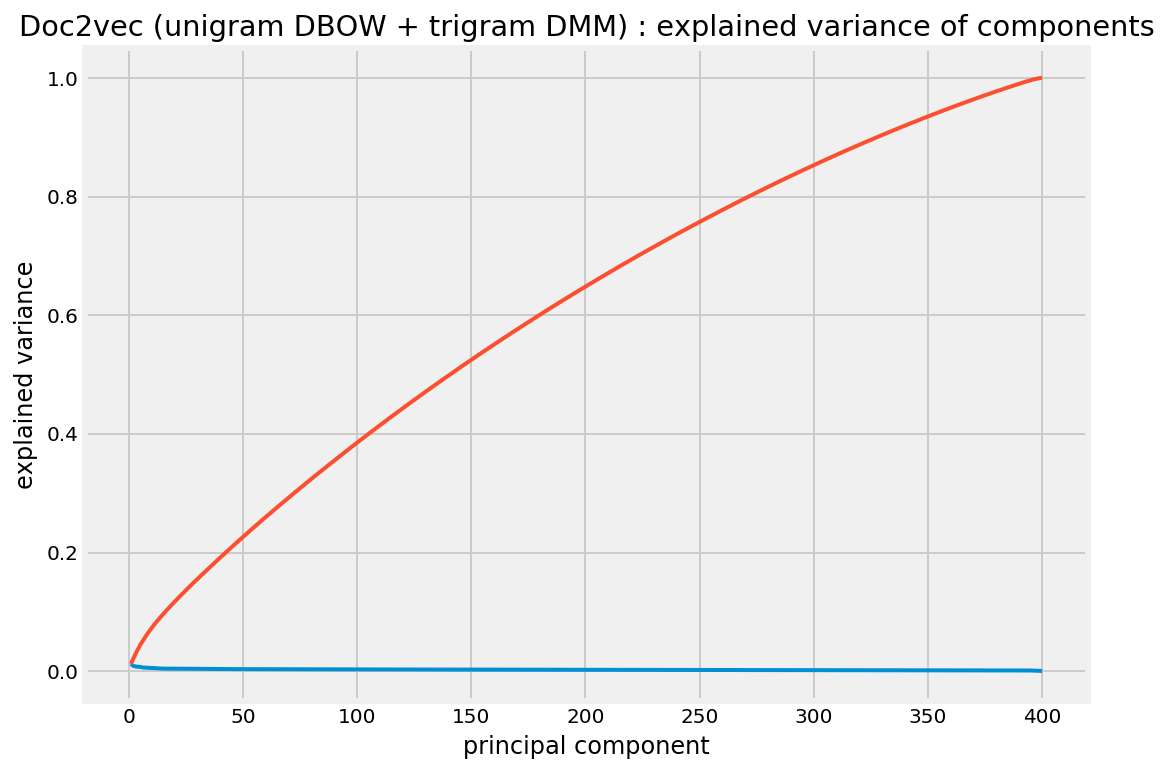

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

***In the above graph, the red line represents cumulative explained variance and the blue line represents explained the variance of each principal component. By looking at the graph above, even though the red line is not perfectly linear, but very close to a straight line. Is this good? No. This means each of the principal components contributes to the variance explanation almost equally, and there’s not much point in reducing the dimensions based on PCA. This can also be seen from the blue line, which is very close to a straight line in the bottom.
It is a bit disappointing, that in our case, dimensionality reduction is not very helpful. ***

#Neural Network with best word vectors (D2Vec with unigram)
The best performing word vectors with logistic regression was chosen to feed to a neural network model. 

I will finally fit a neural network with early stopping and checkpoint so that I can save the best performing weights on validation accuracy.

In [0]:
train_w2v_final = train_vecs_dbow_dmm
validation_w2v_final = validation_vecs_dbow_dmm
test_w2v_final = test_vecs_dbow_dmm

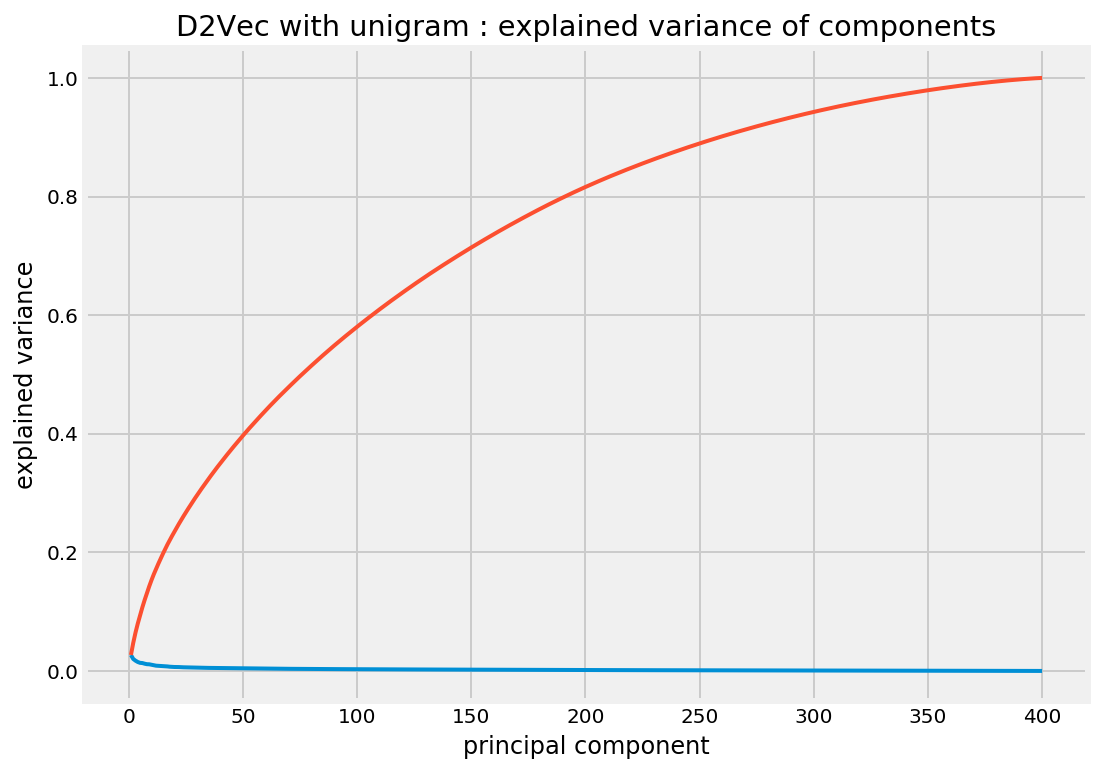

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d2v_ugdbow_tgdmm_std = scaler.fit_transform(train_w2v_final)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(validation_w2v_final)
d2v_ugdbow_tgdmm_std_test=scaler.fit_transform(test_w2v_final)
from sklearn.decomposition import PCA

d2v_pca = PCA().fit(d2v_ugdbow_tgdmm_std)
d2v_pca_val=PCA().fit(d2v_ugdbow_tgdmm_std_val)
d2v_pca_test=PCA().fit(d2v_ugdbow_tgdmm_std_test)
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('D2Vec with unigram : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [57]:
seed=42
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
filepath="w2v_01_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max') 
callbacks_list = [checkpoint, early_stop]
np.random.seed(seed)
model_w2v_01 = Sequential()
model_w2v_01.add(Dense(256, activation='relu', input_dim=400))
model_w2v_01.add(Dense(256, activation='relu'))
model_w2v_01.add(Dense(256, activation='relu'))
model_w2v_01.add(Dense(1, activation='sigmoid')) # after trying 'softmax', it is found the 'sigmoid' can generate better performance
model_w2v_01.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_01.fit(train_w2v_final, y_train, validation_data=(validation_w2v_final, y_validation), 
                 epochs=100, batch_size=32, verbose=2, callbacks=callbacks_list)

W1107 06:07:23.885255 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1107 06:07:23.990256 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1107 06:07:24.080224 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1107 06:07:24.087796 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1107 06:07:24.088854 140331018884992 module_wrapper.py:139] From /usr/local/li

Train on 5208 samples, validate on 1302 samples
Epoch 1/100


W1107 06:07:29.051379 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1107 06:07:29.052872 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1107 06:07:29.199091 140331018884992 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



 - 9s - loss: -7.3355e-01 - acc: 0.3439 - val_loss: -8.6735e-01 - val_acc: 0.3541

Epoch 00001: val_acc improved from -inf to 0.35407, saving model to w2v_01_best_weights.01-0.3541.hdf5
Epoch 2/100
 - 1s - loss: -1.7545e+00 - acc: 0.3804 - val_loss: -9.0309e-01 - val_acc: 0.3917

Epoch 00002: val_acc improved from 0.35407 to 0.39171, saving model to w2v_01_best_weights.02-0.3917.hdf5
Epoch 3/100
 - 1s - loss: -2.4046e+00 - acc: 0.4274 - val_loss: -8.2013e-01 - val_acc: 0.3372

Epoch 00003: val_acc did not improve from 0.39171
Epoch 4/100
 - 1s - loss: -2.9823e+00 - acc: 0.4622 - val_loss: -8.0486e-01 - val_acc: 0.4017

Epoch 00004: val_acc improved from 0.39171 to 0.40169, saving model to w2v_01_best_weights.04-0.4017.hdf5
Epoch 5/100
 - 1s - loss: -3.4560e+00 - acc: 0.5021 - val_loss: -8.1120e-01 - val_acc: 0.4032

Epoch 00005: val_acc improved from 0.40169 to 0.40323, saving model to w2v_01_best_weights.05-0.4032.hdf5
Epoch 6/100
 - 1s - loss: -3.6897e+00 - acc: 0.5225 - val_loss: -8

In [0]:
from keras.models import load_model
loaded_w2v_model = load_model('w2v_01_best_weights.15-0.4270.hdf5')

In [59]:
loaded_w2v_model.evaluate(x=validation_w2v_final, y=y_validation)

1302/1302 [==============================] - 0s 96us/step


[-0.603218752026741, 0.4270353301695781]

In [60]:
loaded_w2v_model.evaluate(x=test_w2v_final, y=y_test)

370/370 [==============================] - 0s 55us/step


[4.339302743447793, 0.34594594626813324]